Haojie Pan 
CSPS 483
Prof. Avery
11/3/20

In [38]:
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets.california_housing import fetch_california_housing


In [39]:
#question 1

california = fetch_california_housing("~/data/sklearn_datasets/")


/Users/macbookpro15/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass data_home=~/data/sklearn_datasets/ as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [41]:
print(california.DESCR)
#print(california.feature_names)
#print(california.target)

cali = pd.DataFrame(california.data, columns = california.feature_names)
target = pd.DataFrame(california.target, columns=['MEDV'])
print(cali.head())
print(target.head())
print(cali.describe())

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [35]:
#question 2
x_bedrooms = cali['AveBedrms']
x_bedrooms = np.array(x_bedrooms).reshape([-1, 1])
y_price = target
print(x_bedrooms.shape)
print(target.shape)

lm = LinearRegression()
lm.fit(x_bedrooms, y_price)

print(f'w0 = {lm.intercept_}')
print(f'w1 = {lm.coef_[0]}')

train_score = lm.score(x_bedrooms, y_price, sample_weight = None)
print('training score: ', train_score)


(20640, 1)
(20640, 1)
w0 = [2.19326559]
w1 = [-0.1137141]
training score:  0.0021809379116133343


Answer: the training score is very low which means the relationship between bedrooms and price are not linear. 

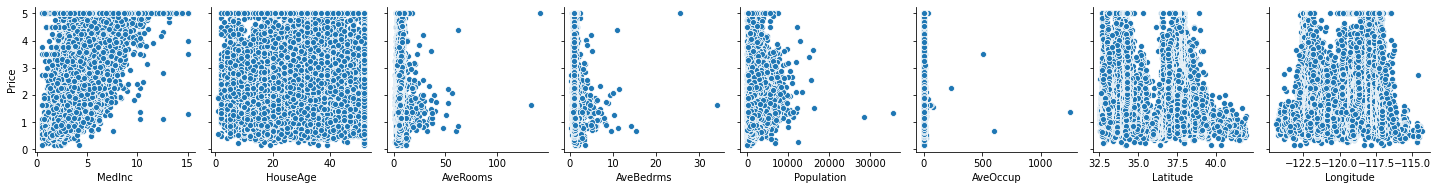

In [42]:
#question 3
cali['Price'] = target
#print(cali.head())

sns.pairplot(cali, 
             x_vars=["MedInc", "HouseAge", "AveRooms",
                    "AveBedrms", "Population", "AveOccup",
                     "Latitude", "Longitude"
                    ],
             y_vars=["Price"],
            )

(206, 9)


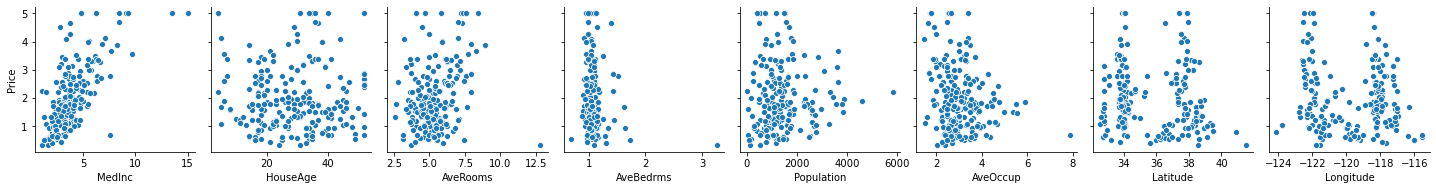

In [47]:
#question 4
cali_sample = cali.sample(frac = 0.01)
#print(cali_sample.shape)

sns.pairplot(cali_sample, 
             x_vars=["MedInc", "HouseAge", "AveRooms",
                    "AveBedrms", "Population", "AveOccup",
                     "Latitude", "Longitude"
                    ],
             y_vars=["Price"],
            )

Answer: For a given x in Average Bedrooms, it returns a big range of price. 

#question 5
Answer: Med income

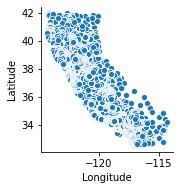

In [49]:
#question 6
sns.pairplot(cali,
             x_vars=["Longitude"],
             y_vars=["Latitude"],
            )


In [54]:
#question 7
cali.cov() #covariance


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,3.609323,-2.846140,1.536568,-0.055858,1.040098e+01,0.370289,-0.323860,-0.057765,1.508475
HouseAge,-2.846140,158.396260,-4.772882,-0.463718,-4.222271e+03,1.724298,0.300346,-2.728244,1.533988
AveRooms,1.536568,-4.772882,6.121533,0.993868,-2.023337e+02,-0.124689,0.562235,-0.136518,0.433826
AveBedrms,-0.055858,-0.463718,0.993868,0.224592,-3.552723e+01,-0.030424,0.070575,0.012670,-0.025539
Population,10.400979,-4222.270582,-202.333712,-35.527225,1.282470e+06,821.712002,-263.137814,226.377839,-32.212487
AveOccup,0.370289,1.724298,-0.124689,-0.030424,8.217120e+02,107.870026,0.052492,0.051519,-0.284494
Latitude,-0.323860,0.300346,0.562235,0.070575,-2.631378e+02,0.052492,4.562293,-3.957054,-0.355326
Longitude,-0.057765,-2.728244,-0.136518,0.012670,2.263778e+02,0.051519,-3.957054,4.014139,-0.106274
Price,1.508475,1.533988,0.433826,-0.025539,-3.221249e+01,-0.284494,-0.355326,-0.106274,1.331615


In [55]:
cali.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Answer：Median Income, House Age, and Average rooms have a positive covariance with price. Block population and average occupance are closely positive related. 
Population with Latitude and Longititude is a interesting one. My interptation for that is more population in South-East of california. 

In [56]:
#question 8
cali.corr(method='pearson', min_periods=1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Answer: Median is the best predictor for house price. 

In [57]:
#question 9
x_income = cali['MedInc']
x_income = np.array(x_income).reshape([-1, 1])
y_price = target
print(x_income.shape)
print(target.shape)

lm = LinearRegression()
lm.fit(x_income, y_price)

print(f'w0 = {lm.intercept_}')
print(f'w1 = {lm.coef_[0]}')

train_score = lm.score(x_income, y_price, sample_weight = None)
print('training score: ', train_score)

(20640, 1)
(20640, 1)
w0 = [0.45085577]
w1 = [0.41793849]
training score:  0.4734474918071989


Answer: the score is much better comparing to the score for experientment (2), but the score is not high enough. 

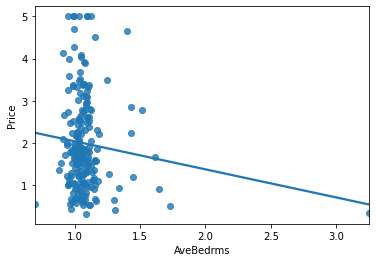

In [60]:
#question 10
ax = sns.regplot(x="AveBedrms", y="Price", data=cali_sample, ci=.95)


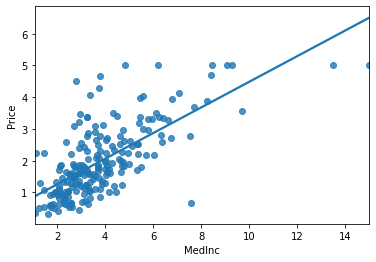

In [61]:
ax = sns.regplot(x="MedInc", y="Price", data=cali_sample, ci=.95)


Answer: The regression line for AveBedrms and Price are very wrong. 
         The regression line for MedInc and Price are better presented the data. 

In [64]:
#question 11
cali = pd.DataFrame(california.data, columns = california.feature_names)
target = pd.DataFrame(california.target, columns=['MEDV'])
print(cali.shape)
print(target.shape)

lm = LinearRegression()
lm.fit(cali, target)

print(f'w0 = {lm.intercept_}')
print(f'w1 = {lm.coef_[0]}')

train_score = lm.score(cali, target, sample_weight = None)
print('training score: ', train_score)


(20640, 8)
(20640, 1)
w0 = [-36.94192021]
w1 = [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
training score:  0.6062326851998051


Answer: The score is better than with single feature Medinc. The reason the score get improved is there are some relationship with other features and house prices. They are not obvious but is there. 